# STUDENT REGRESSION DATASET


# 1.)DATA PRE-PROCESSING 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")


In [53]:
df = pd.read_csv(r"Students data regression.csv")

In [55]:
df.head()

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
0,1141,A,male,1,73.47,64,81,87,60,74,71,60,A,A,A,3,0
1,1142,A,female,1,71.22,57,50,51,51,55,62,61,B,A,A,2,0
2,1143,A,female,2,74.56,47,48,71,60,61,68,64,C,A,A,0,1
3,1144,A,female,1,72.89,46,72,38,60,29,54,51,D,A,A,0,0
4,1145,A,female,1,70.11,49,45,63,60,66,66,61,E,A,A,0,0


In [56]:
df.tail()

,ID,class,gender,race,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from1,from2,from3,from4,y
100,1241,A,female,1,88.34,87,83,92,98,93,86,90,M,B,A,0,1
101,1242,B,male,1,89.84,98,77,95,98,96,88,100,A,B,A,0,1
102,1243,B,male,1,88.82,83,80,91,98,93,95,71,T,B,A,0,2
103,1244,A,male,1,86.60,92,82,91,99,94,82,78,S,B,A,0,2
104,1245,A,male,1,93.71,93,97,99,100,97,90,90,K,B,A,0,2


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   105 non-null    int64  
 1   class                105 non-null    object 
 2   gender               105 non-null    object 
 3   race                 105 non-null    int64  
 4   GPA                  105 non-null    float64
 5   Algebra              105 non-null    int64  
 6   Calculus1            105 non-null    int64  
 7   Calculus2            105 non-null    int64  
 8   Statistics           105 non-null    int64  
 9   Probability          105 non-null    int64  
 10  Measure              105 non-null    int64  
 11  Functional_analysis  105 non-null    int64  
 12  from1                105 non-null    object 
 13  from2                105 non-null    object 
 14  from3                105 non-null    object 
 15  from4                105 non-null    int

In [58]:
df.shape

(105, 17)

In [59]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

In [60]:
print("Categorical columns detected:", categorical_features)
print("Numerical columns detected:", numerical_features)


Categorical columns detected: ['class', 'gender', 'from1', 'from2', 'from3']
Numerical columns detected: ['ID', 'race', 'GPA', 'Algebra', 'Calculus1', 'Calculus2', 'Statistics', 'Probability', 'Measure', 'Functional_analysis', 'from4', 'y']


In [61]:
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('scaler', StandardScaler(), numerical_features)
])

In [62]:
transformed_data = column_transformer.fit_transform(df)

In [63]:
df_transformed = pd.DataFrame(transformed_data)

In [66]:
onehot_categories = column_transformer.named_transformers_['onehot'].get_feature_names_out(categorical_features)
all_columns = np.concatenate([onehot_categories, numerical_features])

In [67]:
df_transformed = pd.DataFrame(transformed_data, columns=all_columns)

In [69]:
df_transformed.head()

,class_A,class_B,gender_female,gender_male,from1_A,from1_AA,from1_AB,from1_B,from1_C,from1_D,...,GPA,Algebra,Calculus1,Calculus2,Statistics,Probability,Measure,Functional_analysis,from4,y
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.574799,-1.033470,0.744561,0.539815,-2.459112,-0.943810,-0.952662,-1.184105,2.819324,-0.866025
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.948286,-1.633470,-1.809229,-1.872126,-3.339696,-2.759529,-1.830970,-1.106833,1.689442,-0.866025
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.393864,-2.490613,-1.973990,-0.532158,-2.459112,-2.186144,-1.245432,-0.875016,-0.570321,0.346410
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.671075,-2.576327,0.003138,-2.743104,-2.459112,-5.244197,-2.611689,-1.879556,-0.570321,-0.866025
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.132540,-2.319184,-2.221131,-1.068145,-2.459112,-1.708323,-1.440611,-1.106833,-0.570321,-0.866025


# 2.) EDA

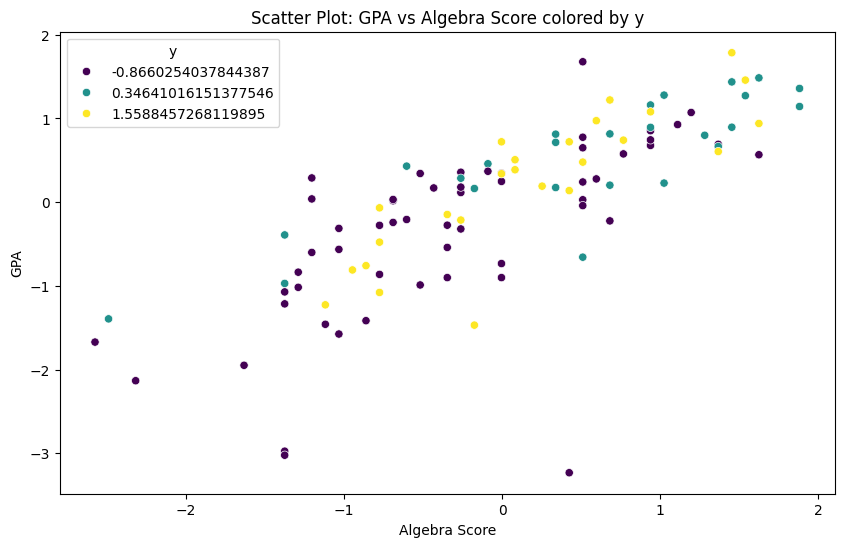

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_transformed, x="Algebra", y="GPA", hue="y", palette="viridis")
plt.title("Scatter Plot: GPA vs Algebra Score colored by y")
plt.xlabel("Algebra Score")
plt.ylabel("GPA")
plt.show()
                

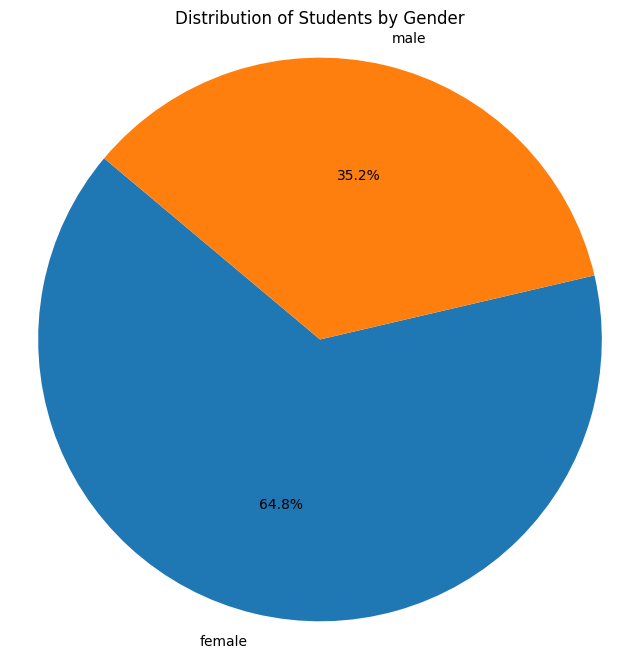

In [90]:
df = pd.read_csv("Students data regression.csv")
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Students by Gender")
plt.axis('equal') 
plt.show()


<Axes: ylabel='GPA'>

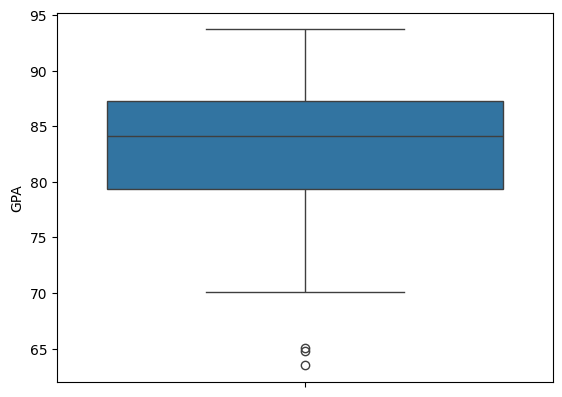

In [91]:
sns.boxplot(df["GPA"])

<Axes: ylabel='Algebra'>

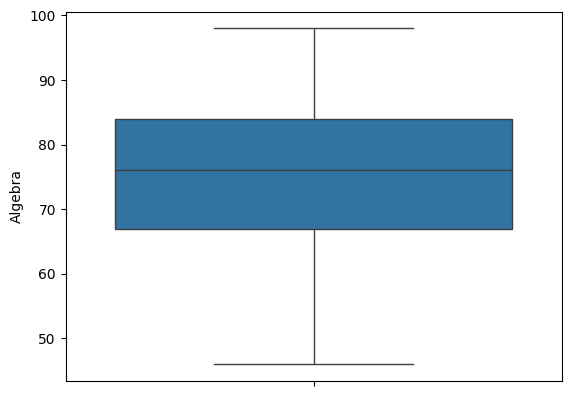

In [92]:
sns.boxplot(df["Algebra"])

<Axes: ylabel='Calculus1'>

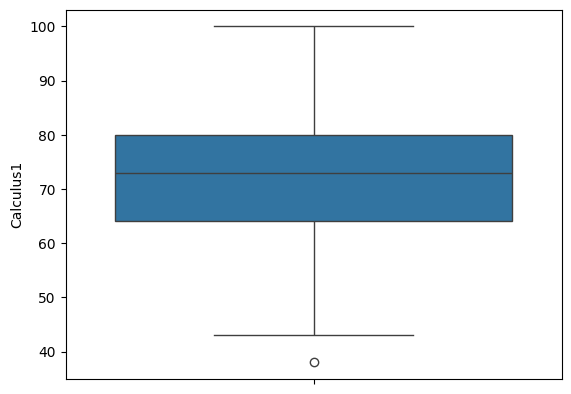

In [93]:
sns.boxplot(df["Calculus1"])

<Axes: ylabel='Calculus2'>

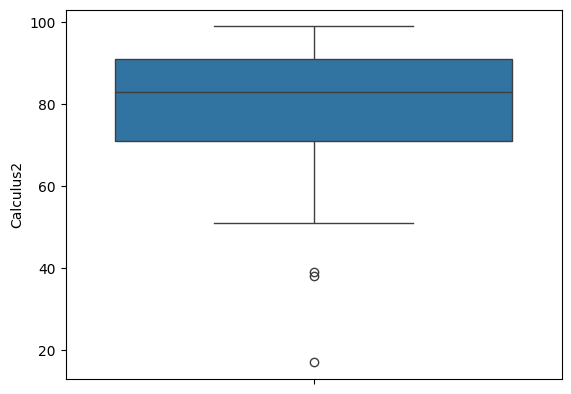

In [94]:
sns.boxplot(df["Calculus2"])

<Axes: ylabel='Probability'>

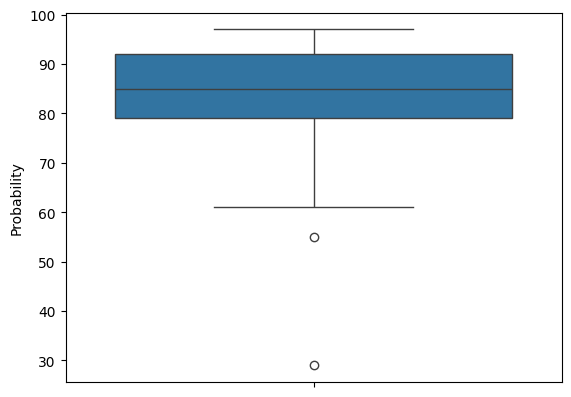

In [95]:
sns.boxplot(df["Probability"])

<Axes: ylabel='Measure'>

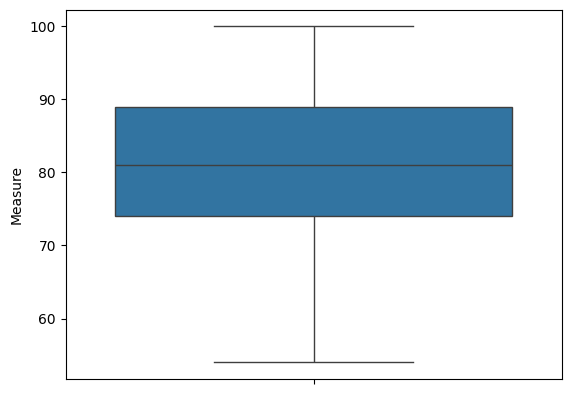

In [96]:
sns.boxplot(df["Measure"])

<Axes: ylabel='Functional_analysis'>

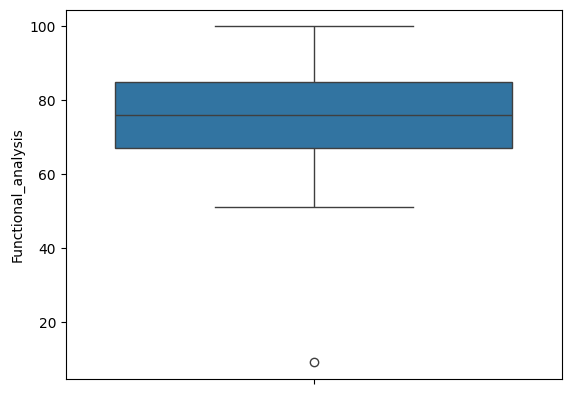

In [97]:
sns.boxplot(df["Functional_analysis"])

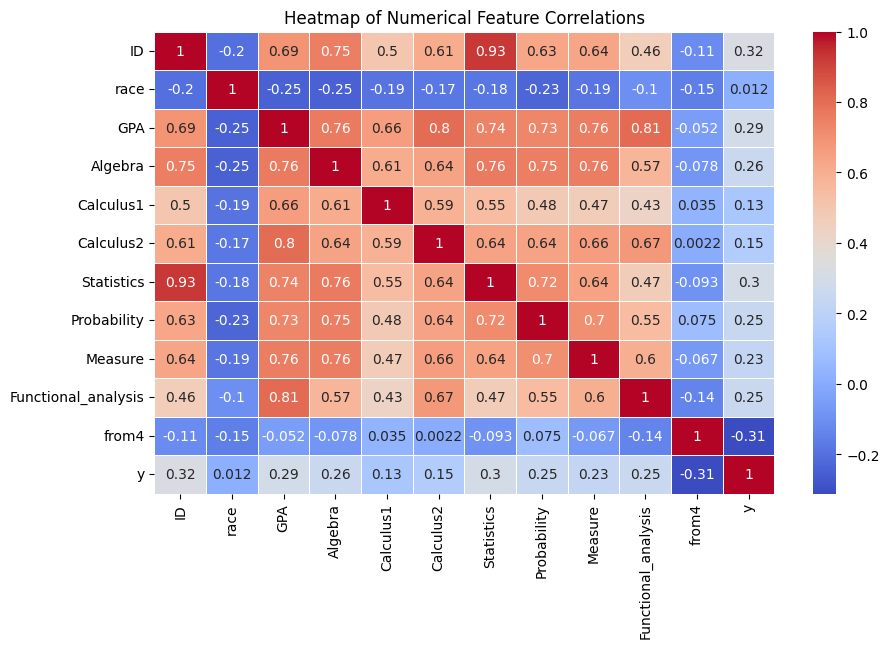

In [103]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Numerical Feature Correlations")
plt.show()

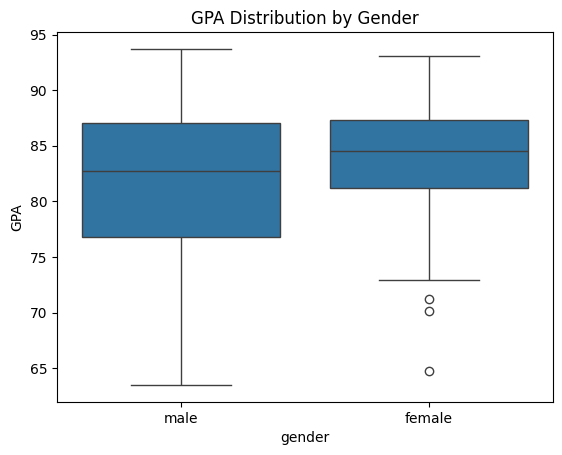

In [112]:
sns.boxplot(x=df["gender"], y=df["GPA"])
plt.title("GPA Distribution by Gender")
plt.show()
